<a href="https://colab.research.google.com/github/sushantnair/Support_Vector_Machine/blob/main/Linear_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data_points = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Example1_Finding_Hyperplane_Linear_SVM.csv')
data_points

,Positive,Negative
0,"(3, 1)","(1, 0)"
1,"(3, -1)","(0, 1)"
2,"(6, 1)","(0, -1)"
3,"(6, -1)","(-1, 0)"


In [4]:
data_class_values_dict = dict()

data_classes = data_points.columns.tolist()
data_classes

['Positive', 'Negative']

In [5]:
for data_class in data_classes:
    print(data_points[f'{data_class}'])
    for data_point in data_points[f'{data_class}']:
        print(f'Original Datapoint: {data_point}')
        horz = np.array([float(x) for x in data_point.strip('()').split(',')])
        print(f'Horizontal NumPy Array:\n{horz}')
        # vert = horz.reshape(-1,1)
        # print(f'Vertical NumPy Array:\n{vert}')
        if data_class not in data_class_values_dict:
            data_class_values_dict[f'{data_class}'] = [horz]
        else:
            data_class_values_dict[f'{data_class}'].append(horz)

print(f'{data_class_values_dict}')

0     (3, 1)
1    (3, -1)
2     (6, 1)
3    (6, -1)
Name: Positive, dtype: object
Original Datapoint: (3, 1)
Horizontal NumPy Array:
[3. 1.]
Original Datapoint: (3, -1)
Horizontal NumPy Array:
[ 3. -1.]
Original Datapoint: (6, 1)
Horizontal NumPy Array:
[6. 1.]
Original Datapoint: (6, -1)
Horizontal NumPy Array:
[ 6. -1.]
0     (1, 0)
1     (0, 1)
2    (0, -1)
3    (-1, 0)
Name: Negative, dtype: object
Original Datapoint: (1, 0)
Horizontal NumPy Array:
[1. 0.]
Original Datapoint: (0, 1)
Horizontal NumPy Array:
[0. 1.]
Original Datapoint: (0, -1)
Horizontal NumPy Array:
[ 0. -1.]
Original Datapoint: (-1, 0)
Horizontal NumPy Array:
[-1.  0.]
{'Positive': [array([3., 1.]), array([ 3., -1.]), array([6., 1.]), array([ 6., -1.])], 'Negative': [array([1., 0.]), array([0., 1.]), array([ 0., -1.]), array([-1.,  0.])]}


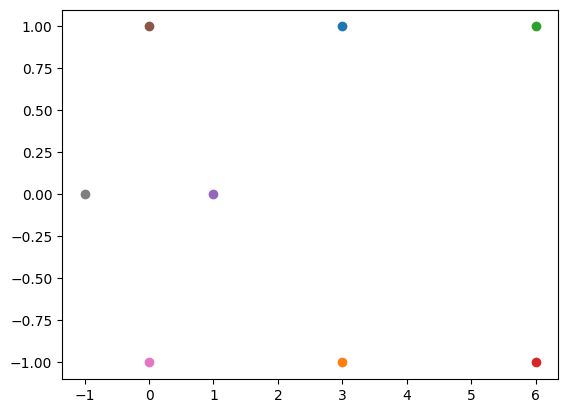

In [6]:
# Plot the data points
for data_class, data_points in data_class_values_dict.items():
    for data_point in data_points:
        plt.plot(data_point[0], data_point[1], 'o', label=data_class)

In [7]:
# Find the Euclidean Distance between two points
def euclidean(point1, point2):
    return(np.sqrt(np.sum((point1 - point2)**2)))

In [8]:
# frontier_points: A dictionary exactly of the same structure as data_class_values_dict, except that the values for each class include
#                  only the frontier points
# min_distances  : A list which stores the minimum distance between a given point and all other points for all points.

def find_frontier_points(data_class_values_dict):
    frontier_points = dict()
    for data_class in data_class_values_dict:
        min_distances = list()
        for data_point in data_class_values_dict[data_class]:
            # Calculate distance between current point and all points of other class(es)
            distances = [euclidean(data_point, other_data_point) for other_data_class in data_class_values_dict if other_data_class != data_class for other_data_point in data_class_values_dict[other_data_class]]
            # Get minimum distance between current point and all points of other class(es)
            min_dist = min(distances)
            min_distances.append(min_dist)
        # Find the indices of the leading points from the data_class_values_dict dictionary with minimum distance
        leading_points_indices = [i for i, dist in enumerate(min_distances) if dist == min(min_distances)]
        # Extract the leading points based on their indices
        leading_points = [data_class_values_dict[data_class][i] for i in leading_points_indices]
        frontier_points[data_class] = leading_points
    return frontier_points


In [15]:
frontier_points = find_frontier_points(data_class_values_dict)
print(frontier_points)

{'Positive': [array([3., 1.]), array([ 3., -1.])], 'Negative': [array([1., 0.])]}


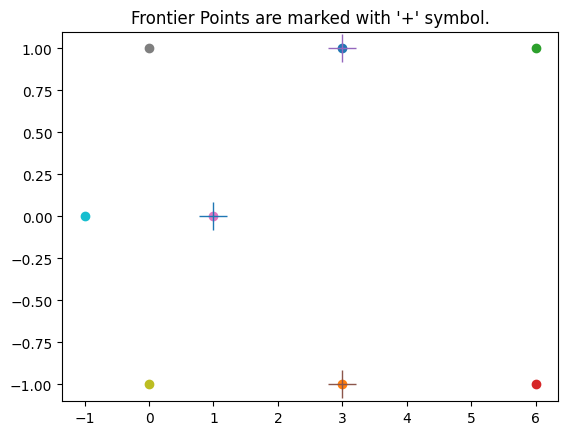

In [16]:
for data_class, points in data_class_values_dict.items():
    for point in points:
        plt.plot(point[0], point[1], 'o', label=data_class)
    for point in frontier_points[data_class]:
        plt.plot(point[0], point[1], '+', label=f'{data_class} Frontier', markersize=20)
    plt.title('Frontier Points are marked with \'+\' symbol.')

In [27]:
class_number_dict = dict()
choice = input('Do you want default values for example or automatic values? Press Y else N: ')
if choice == 'Y':
    class_number_dict = {'Positive': 1, 'Negative': -1}
else:
    for i, data_class in enumerate(data_classes):
        class_number_dict[data_class] = i+1

print(class_number_dict)

Do you want default values for example or automatic values? Press Y else N: Y
{'Positive': 1, 'Negative': -1}


In [17]:
# Convert Horizontal NumPy to Vertical NumPy
# Next, augment each vector with 1 as bias input
# temp_frontier_points = dict()
temp_frontier_points = list()
for data_class, frontier_points in frontier_points.items():
    print(data_class, frontier_points)
    for frontier_point in frontier_points:
        horz_frontier_point = frontier_point
        print(f'Horizontal Frontier Point:\n{horz_frontier_point}')
        vert_frontier_point = horz_frontier_point.reshape(-1,1)
        print(f'Vertical Frontier Point:\n{vert_frontier_point}')
        augm_frontier_point = np.vstack((vert_frontier_point, [[1.]]))
        print(f'Augmented Frontier Point:\n{augm_frontier_point}')
        '''
        if data_class not in temp_frontier_points:
            temp_frontier_points[data_class] = [augm_frontier_point]
        else:
            temp_frontier_points[data_class].append(augm_frontier_point)
        '''
        # A shift in approach: instad of frontier_points = {'Positive': [array([3., 1., 1.]), array([3., -1., 1.])], 'Negative': [array([1., 0., 1.])]}
        # we have frontier_points = {'array([3., 1., 1.])': 'Positive', 'array([3., -1., 1.])': 'Positive', 'array([1., 0., 1.])' = 'Negative'}
        # so that we get the form of s1_bar, s2_bar, s3_bar for convenience in future operations
        '''
        temp_frontier_points[augm_frontier_point] = data_class
        '''
        # Unfortunately, NumPy arrays cannot become key of a dictionary, unless it is converted to bit notation.
        # Why not try list of tuples? frontier_points = [(array([3., 1., 1.]), 'Positive'), (array([3., -1., 1.]), 'Positive'), (array([1., 0., 1.]), 'Negative')]
        temp_frontier_points.append((augm_frontier_point, data_class))

frontier_points = temp_frontier_points
print(frontier_points)

Positive [array([3., 1.]), array([ 3., -1.])]
Horizontal Frontier Point:
[3. 1.]
Vertical Frontier Point:
[[3.]
 [1.]]
Augmented Frontier Point:
[[3.]
 [1.]
 [1.]]
Horizontal Frontier Point:
[ 3. -1.]
Vertical Frontier Point:
[[ 3.]
 [-1.]]
Augmented Frontier Point:
[[ 3.]
 [-1.]
 [ 1.]]
Negative [array([1., 0.])]
Horizontal Frontier Point:
[1. 0.]
Vertical Frontier Point:
[[1.]
 [0.]]
Augmented Frontier Point:
[[1.]
 [0.]
 [1.]]
[(array([[3.],
       [1.],
       [1.]]), 'Positive'), (array([[ 3.],
       [-1.],
       [ 1.]]), 'Positive'), (array([[1.],
       [0.],
       [1.]]), 'Negative')]


In [39]:
equation_coefficients = list()
rhs_coefficients = list()
# Refer to Reference 1 in References Section for explanation

for i, frontier_point_tuple_i in enumerate(frontier_points):
    print(f's{i+1}_bar:\n{frontier_point_tuple_i[0]}\n{frontier_point_tuple_i[1]}\n{class_number_dict[frontier_point_tuple_i[1]]}\n\n')
    sub_equation_coefficients = list()
    for j, frontier_point_tuple_j in enumerate(frontier_points):
        print(f's{j+1}_bar . s{i+1}_bar:\n{frontier_point_tuple_j[0]} . {frontier_point_tuple_i[0]}')
        equation_coefficient = np.dot(frontier_point_tuple_j[0].T, frontier_point_tuple_i[0])
        print(equation_coefficient[0][0])
        sub_equation_coefficients.append(equation_coefficient[0][0])
    print(sub_equation_coefficients)
    rhs_coefficients.append(class_number_dict[frontier_point_tuple_i[1]])
    equation_coefficients.append(sub_equation_coefficients)
print(f'Equation Coefficients: {equation_coefficients}')
print(f'RHS Coefficients: {rhs_coefficients}')

s1_bar:
[[3.]
 [1.]
 [1.]]
Positive
1


s1_bar . s1_bar:
[[3.]
 [1.]
 [1.]] . [[3.]
 [1.]
 [1.]]
11.0
s2_bar . s1_bar:
[[ 3.]
 [-1.]
 [ 1.]] . [[3.]
 [1.]
 [1.]]
9.0
s3_bar . s1_bar:
[[1.]
 [0.]
 [1.]] . [[3.]
 [1.]
 [1.]]
4.0
[11.0, 9.0, 4.0]
s2_bar:
[[ 3.]
 [-1.]
 [ 1.]]
Positive
1


s1_bar . s2_bar:
[[3.]
 [1.]
 [1.]] . [[ 3.]
 [-1.]
 [ 1.]]
9.0
s2_bar . s2_bar:
[[ 3.]
 [-1.]
 [ 1.]] . [[ 3.]
 [-1.]
 [ 1.]]
11.0
s3_bar . s2_bar:
[[1.]
 [0.]
 [1.]] . [[ 3.]
 [-1.]
 [ 1.]]
4.0
[9.0, 11.0, 4.0]
s3_bar:
[[1.]
 [0.]
 [1.]]
Negative
-1


s1_bar . s3_bar:
[[3.]
 [1.]
 [1.]] . [[1.]
 [0.]
 [1.]]
4.0
s2_bar . s3_bar:
[[ 3.]
 [-1.]
 [ 1.]] . [[1.]
 [0.]
 [1.]]
4.0
s3_bar . s3_bar:
[[1.]
 [0.]
 [1.]] . [[1.]
 [0.]
 [1.]]
2.0
[4.0, 4.0, 2.0]
Equation Coefficients: [[11.0, 9.0, 4.0], [9.0, 11.0, 4.0], [4.0, 4.0, 2.0]]
RHS Coefficients: [1, 1, -1]


In [40]:
# Solve System of Equations to get value of α
α = np.linalg.solve(equation_coefficients, rhs_coefficients)
print(f'α: {α}')

α: [ 0.75  0.75 -3.5 ]


In [53]:
# Get the value of 'w' and 'b'
w = 0
for i, frontier_point_tuple in enumerate(frontier_points):
    w += α[i] * frontier_point_tuple[0]

for i, item in enumerate(w):
    # print(round(item[0], 2))
    w[i] = round(item[0], 2)

b = w[-1].item()
print(f'b: {b}')

w = w[:-1]
print(f'w: {w}')

1.0
0.0
-2.0
b: -2.0
w: [[1.]
 [0.]]


In [57]:
# Time for classification!
point = [4, 1]
horz_point = np.array(point)
vert_point = horz_point.reshape(-1,1)
print(vert_point)
dot = np.dot(w.T, vert_point)
print(dot[0][0])
res = dot + b
print(res[0][0])
if res > 0:
    print(f'Positive Class')
else:
    print(f'Negative Class')

[[4]
 [1]]
4.0
2.0
Positive Class


In [38]:
# @title Reference 1: System of Equations in Python
# SOURCE: ChatGPT

'''
a1x + b1y + c1z = d1
a2x + b2y + c2z = d2
a3x + b3y + c3z = d3
'''
'''
A = np.array([[a1, b1, c1], [a2, b2, c2], [a3, b3, c3]])
b = np.array([d1, d2, d3])
'''

# Coefficients matrix
equation_coefficients = [[4, 3, 2], [-2, 2, 3], [3, -5, 2]]
A = np.array(equation_coefficients)

# Constants vector
rhs_coefficients = [25, -10, -4]
b = np.array(rhs_coefficients)

# Solve the system of equations
x = np.linalg.solve(A, b)

# Print the solution
print(x)

[ 5.  3. -2.]


In [ ]:
# @title Reference 2: Extract Tuple Datapoint Values of Classes
# SOURCE: ChatGPT

import pandas as pd
import numpy as np

# Custom converter function to convert string representation of tuples to NumPy arrays
def tuple_converter(string):
    # Remove parentheses and split by comma, then convert to float
    return np.array([float(x) for x in string.strip('()').split(',')])

# Read the CSV file with custom converter
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Example1_Finding_Hyperplane_Linear_SVM.csv', converters={'Positive': tuple_converter, 'Negative': tuple_converter})

# Access the arrays
positive_array = df['Positive'].values
negative_array = df['Negative'].values

print("Positive Array:", positive_array)
print("Negative Array:", negative_array)


In [ ]:
# @title Reference 3: Finding Frontier Points
# SOURCE: Phind

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming data_points and data_class_values_dict are already defined as in your code

def calculate_euclidean_distance(point1, point2):
    """Calculate the Euclidean distance between two points."""
    return np.sqrt(np.sum((point1 - point2)**2))

def find_leading_points(data_class_values_dict):
    """Find the leading points for each class."""
    frontier_points = {}
    for data_class in data_class_values_dict:
        # Initialize a list to store the minimum distances for each point
        min_distances = []
        for point in data_class_values_dict[data_class]:
            # Calculate the distance to all points in the other class
            distances = [calculate_euclidean_distance(point, other_point) for other_class in data_class_values_dict if other_class != data_class for other_point in data_class_values_dict[other_class]]
            # Find the minimum distance
            min_distance = min(distances)
            min_distances.append(min_distance)
        # Find the indices of the points with the minimum distance
        leading_indices = [i for i, dist in enumerate(min_distances) if dist == min(min_distances)]
        # Select the leading points
        leading_points = [data_class_values_dict[data_class][i] for i in leading_indices]
        frontier_points[data_class] = leading_points
    return frontier_points

# Find the leading points
frontier_points = find_leading_points(data_class_values_dict)

# Plot the data points and the leading points
for data_class, points in data_class_values_dict.items():
    for point in points:
        plt.plot(point[0], point[1], 'o', label=data_class)
    for point in frontier_points[data_class]:
        plt.plot(point[0], point[1], 'ro', label=f'{data_class} Frontier')

plt.legend()
plt.show()

# Print the frontier points
print(frontier_points)



In [ ]:
# @title Reference 4: Concatenate the Bias to the bottom of the Vertical NumPy Array
# SOURCE: ChatGPT

import numpy as np

# Existing vertical NumPy array
existing_array = np.array([[3.], [1.]])

# Number to add at the bottom
number_to_add = 5.0

# Concatenate the existing array with the new number
existing_array = np.concatenate((existing_array, [[number_to_add]]), axis=0)

print("Updated array:")
print(existing_array)

# OR

# Existing vertical NumPy array
existing_array = np.array([[3.], [1.]])

# Number to add at the bottom
number_to_add = 5.0

# Stack the existing array with the new number
new_array = np.vstack((existing_array, number_to_add))

print("New array:")
print(new_array)

